## DATA IMPORT FROM GOOGLE DRIVE

In [6]:
df=pd.read_csv("https://drive.google.com/uc?export=download&id=1Dyt6laIWQNO4p6FHyw335QG8rKLyeXP1")
df[df['Symbol']=='KOTAKBANK']

,Company Name,Industry,Symbol,Series,ISIN Code,instrument_key
277,Kotak Mahindra Bank Ltd.,Financial Services,KOTAKBANK,EQ,INE237A01028,NSE_EQ|INE237A01028


## IMPPORTING HISTORICAL DATA FOR STOCKS

In [33]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
data=yf.download(tickers='HAL.NS',period='max',interval='1d')
historical_stock_data=data['Adj Close']

[*********************100%%**********************]  1 of 1 completed


## AUTHENTICATION

In [7]:
import urllib.parse
import pandas as pd
import requests

apikey='7112261b-c8d0-4e6b-b9cc-7fd1e5c56752'
secretkey='xoxzuh2k62'
rurl=urllib.parse.quote('https://127.0.0.1:5000/',safe="")



In [8]:
uri=f'https://api.upstox.com/v2/login/authorization/dialog?response_type=code&client_id=7112261b-c8d0-4e6b-b9cc-7fd1e5c56752&redirect_uri=https://127.0.0.1:5000/&state=RnJpIERlYyAxNiAyMDIyIDE1OjU4OjUxIEdNVCswNTMwIChJbmRpYSBTdGFuZGFyZCBUaW1lKQ%3D%3D'
uri


'https://api.upstox.com/v2/login/authorization/dialog?response_type=code&client_id=7112261b-c8d0-4e6b-b9cc-7fd1e5c56752&redirect_uri=https://127.0.0.1:5000/&state=RnJpIERlYyAxNiAyMDIyIDE1OjU4OjUxIEdNVCswNTMwIChJbmRpYSBTdGFuZGFyZCBUaW1lKQ%3D%3D'

In [25]:
code='8Y-HXG'

In [12]:
import requests
import pandas as pd

url = 'https://api.upstox.com/v2/login/authorization/token'
headers = {
    'accept': 'application/json',
    'Content-Type': 'application/x-www-form-urlencoded',
}

data = {
    'code': code,
    'client_id': apikey,
    'client_secret': secretkey,
    'redirect_uri': 'https://127.0.0.1:5000/',
    'grant_type': 'authorization_code',
}

response = requests.post(url, headers=headers, data=data)

# Check the response status
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Convert to DataFrame
    df_token = pd.DataFrame(data.items(), columns=['Key', 'Value'])

    # Print the DataFrame
    print(df_token)

else:
    # Print an error message if the request was not successful
    print(f"Error: {response.status_code} - {response.text}")

# Alternatively, you can use loc
access_token_value = df_token.loc[df_token['Key'] == 'access_token', 'Value'].iloc[0]

# Print the access_token value
print("Access Token:", access_token_value)


               Key                                              Value
0            email                             iit2022231@iiita.ac.in
1        exchanges                     [NSE, BSE, CDS, NFO, BFO, BCD]
2         products                                    [OCO, D, CO, I]
3           broker                                             UPSTOX
4          user_id                                             58AUGK
5        user_name                               LAXMI NARAYAN SHARMA
6      order_types                          [MARKET, LIMIT, SL, SL-M]
7        user_type                                         individual
8              poa                                              False
9        is_active                                               True
10    access_token  eyJ0eXAiOiJKV1QiLCJrZXlfaWQiOiJza192MS4wIiwiYW...
11  extended_token                                               None
Access Token: eyJ0eXAiOiJKV1QiLCJrZXlfaWQiOiJza192MS4wIiwiYWxnIjoiSFMyNTYifQ.eyJzdWIiOiI1O

## LTP FETCHING

In [26]:
import requests
import json

def get_last_traded_price(access_token_value,instrument_key,symbol):
    ltp=-1
    url = f'https://api.upstox.com/v2/market-quote/ltp?instrument_key={instrument_key}'
    headers = {
        'Accept': 'application/json',
        'Authorization': f'Bearer {access_token_value}'
    }


    # Make the HTTP GET request
    response = requests.get(url, headers=headers)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the JSON response
        response_data = response.json()


        for key in response_data['data']:
          ltp = response_data['data'][key]['last_price']


        # Return the LTP

        return ltp
    else:
        # Print an error message if the request was not successful
        print(f"Failed to fetch data. Status code: {response.status_code}")
        return None


In [27]:
# get_last_traded_price(access_token_value,'NSE_EQ|INE066F01020','KOTAKBANK')

## USING GET LTP FUNCTION

In [15]:
my_rej_list=[]
my_succ_list=[]

for i in range(len(df)):
  ltp=get_last_traded_price(access_token_value,df.iloc[i,-1],df.iloc[i,2])
  print(ltp)
  if ltp==-1:
    my_rej_list.append(df.iloc[i,2])
  else:
    my_succ_list.append([df.iloc[i,2],ltp])

ltp_df=pd.DataFrame(my_succ_list,columns=['symbol','ltp'])
my_rej_list
print(len(my_succ_list),len(my_rej_list),len(df))
print(my_rej_list)

1016.3
38193.3
7465.7
2380.6
4359.5
1416.45
632.0
499.45
706.6
1629.25
27975.0
1159.1
3038.2
1768.75
1493.85
690.85
857.05
382.35
206.05
323.5
739.0
869.3
1433.8
2841.85
1196.3
5314.2
2082.2
61.25
24.91
1507.55
4225.0
636.15
2121.8
780.15
8213.25
6687.6
523.7
310.55
741.75
609.95
244.0
3093.4
368.55
2105.5
7705.55
1421.25
664.4
4817.45
1133.5
4181.35
349.9
2387.6
9485.05
6596.7
1567.7
9121.4
2294.0
3155.55
473.7
202.24
239.95
122.35
62.17
1557.2
6637.45
544.35
-1
290.25
1553.05
291.65
341.7
1465.7
709.3
340.4
1456.0
578.8
7945.5
1626.95
2137.7
509.95
32355.2
1124.25
6.86
5697.9
2154.85
631.75
170.53
691.25
549.0
4217.0
330.3
293.85
782.0
-1
-1
1599.4
247.1
2551.15
58.65
2310.9
686.5
2167.65
9436.7
802.4
497.9
545.5
1466.1
1346.85
1515.05
162.51
1590.45
506.8
2411.0
5897.05
3368.15
3991.15
1531.0
978.25
1613.6
5183.0
1285.0
428.5
3497.9
1703.05
1048.15
810.15
634.0
1756.55
2962.9
930.8
2953.45
406.1
126.87
181.27
4826.95
11141.6
3160.15
6812.05
751.9
414.35
208.61
39.66
4675.75
640.4
74

## FETCHING OPTION CHAIN  DATA

In [28]:
import requests
def import_option_chain_data(instrument_key,access_token_value):
  url = 'https://api.upstox.com/v2/option/chain'
  params = {
      'instrument_key': 'NSE_EQ|INE066F01020',
      'expiry_date': '2024-08-29'
  }
  headers = {
      'Accept': 'application/json',
      'Authorization': f'Bearer {access_token_value}'
  }

  response = requests.get(url, params=params, headers=headers)
  # Process the response data as needed
  data=response.json()
  print(response.json())
  return data


In [29]:
data=import_option_chain_data('NSE_EQ|INE066F01020',access_token_value)

{'status': 'success', 'data': [{'expiry': '2024-08-29', 'strike_price': 3800.0, 'underlying_key': 'NSE_EQ|INE066F01020', 'underlying_spot_price': 4591.1, 'call_options': {'instrument_key': 'NSE_FO|107259', 'market_data': {'ltp': 0.0, 'volume': 0, 'oi': 0.0, 'close_price': 1276.75, 'bid_price': 803.35, 'bid_qty': 900, 'ask_price': 890.95, 'ask_qty': 900, 'prev_oi': 0.0}, 'option_greeks': {'vega': 0.0, 'theta': 0.0, 'gamma': 0.0, 'delta': 1.0, 'iv': 0.0}}, 'put_options': {'instrument_key': 'NSE_FO|107260', 'market_data': {'ltp': 23.45, 'volume': 289500, 'oi': 74400.0, 'close_price': 32.1, 'bid_price': 22.7, 'bid_qty': 300, 'ask_price': 24.15, 'ask_qty': 2400, 'prev_oi': 0.0}, 'option_greeks': {'vega': 1.6873, 'theta': -1.9331, 'gamma': 0.0002, 'delta': -0.0759, 'iv': 54.99}}}, {'expiry': '2024-08-29', 'pcr': 36.95, 'strike_price': 4000.0, 'underlying_key': 'NSE_EQ|INE066F01020', 'underlying_spot_price': 4591.1, 'call_options': {'instrument_key': 'NSE_FO|107261', 'market_data': {'ltp': 63

In [18]:
def format_option_chain_data_into_dataframe(data):
  # Extract general data
  general_data = []
  call_data = []
  put_data = []

  for item in data['data']:
      general_info = {
          'expiry': item.get('expiry'),
          'strike_price': item.get('strike_price'),
          'underlying_key': item.get('underlying_key'),
          'underlying_spot_price': item.get('underlying_spot_price'),
          'pcr': item.get('pcr')
      }
      general_data.append(general_info)

      if 'call_options' in item:
          call_option = item['call_options']
          call_data.append({
              'expiry': item['expiry'],
              'strike_price': item['strike_price'],
              'instrument_key': call_option['instrument_key'],
              'ltp': call_option['market_data']['ltp'],
              'volume': call_option['market_data']['volume'],
              'oi': call_option['market_data']['oi'],
              'close_price': call_option['market_data']['close_price'],
              'bid_price': call_option['market_data']['bid_price'],
              'bid_qty': call_option['market_data']['bid_qty'],
              'ask_price': call_option['market_data']['ask_price'],
              'ask_qty': call_option['market_data']['ask_qty'],
              'prev_oi': call_option['market_data']['prev_oi'],
              'vega': call_option['option_greeks']['vega'],
              'theta': call_option['option_greeks']['theta'],
              'gamma': call_option['option_greeks']['gamma'],
              'delta': call_option['option_greeks']['delta'],
              'iv': call_option['option_greeks']['iv']
          })

      if 'put_options' in item:
          put_option = item['put_options']
          put_data.append({
              'expiry': item['expiry'],
              'strike_price': item['strike_price'],
              'instrument_key': put_option['instrument_key'],
              'ltp': put_option['market_data']['ltp'],
              'volume': put_option['market_data']['volume'],
              'oi': put_option['market_data']['oi'],
              'close_price': put_option['market_data']['close_price'],
              'bid_price': put_option['market_data']['bid_price'],
              'bid_qty': put_option['market_data']['bid_qty'],
              'ask_price': put_option['market_data']['ask_price'],
              'ask_qty': put_option['market_data']['ask_qty'],
              'prev_oi': put_option['market_data']['prev_oi'],
              'vega': put_option['option_greeks']['vega'],
              'theta': put_option['option_greeks']['theta'],
              'gamma': put_option['option_greeks']['gamma'],
              'delta': put_option['option_greeks']['delta'],
              'iv': put_option['option_greeks']['iv']
          })

  # Convert lists to DataFrames
  df_general = pd.DataFrame(general_data)
  df_call = pd.DataFrame(call_data)
  df_put = pd.DataFrame(put_data)

  # Display the DataFrames
  print("General Data DataFrame:")
  print(df_general)

  print("\nCall Options DataFrame:")
  print(df_call)

  print("\nPut Options DataFrame:")
  print(df_put)
  return df_call



In [30]:
df_call=format_option_chain_data_into_dataframe(data)

General Data DataFrame:
        expiry  strike_price       underlying_key  underlying_spot_price  \
0   2024-08-29        3800.0  NSE_EQ|INE066F01020                 4591.1   
1   2024-08-29        4000.0  NSE_EQ|INE066F01020                 4591.1   
2   2024-08-29        4200.0  NSE_EQ|INE066F01020                 4591.1   
3   2024-08-29        4300.0  NSE_EQ|INE066F01020                 4591.1   
4   2024-08-29        4400.0  NSE_EQ|INE066F01020                 4591.1   
5   2024-08-29        4500.0  NSE_EQ|INE066F01020                 4591.1   
6   2024-08-29        4600.0  NSE_EQ|INE066F01020                 4591.1   
7   2024-08-29        4700.0  NSE_EQ|INE066F01020                 4591.1   
8   2024-08-29        4800.0  NSE_EQ|INE066F01020                 4591.1   
9   2024-08-29        4900.0  NSE_EQ|INE066F01020                 4591.1   
10  2024-08-29        5000.0  NSE_EQ|INE066F01020                 4591.1   
11  2024-08-29        5100.0  NSE_EQ|INE066F01020               

## EXTRACTING ONLY LTP AND STRIKES

In [20]:
def extrcting_only_ltp_and_strikes(df_call):
  new_data_frame=df_call.iloc[:,[1,3]]
  new_data_frame.drop(index=0,inplace=True)
  new_data_frame.reset_index(drop=True,inplace=True)
  my_strike_list=new_data_frame['strike_price'].tolist()
  print(new_data_frame)
  return my_strike_list,new_data_frame

In [23]:
my_strike_list,new_data_frame=extrcting_only_ltp_and_strikes(df_call)

    strike_price     ltp
0         4000.0  639.70
1         4200.0  459.05
2         4300.0  391.05
3         4400.0  324.50
4         4500.0  259.40
5         4600.0  205.30
6         4700.0  161.45
7         4800.0  124.30
8         4900.0   96.55
9         5000.0   74.35
10        5100.0   56.95
11        5200.0   43.90
12        5300.0   35.00
13        5400.0   27.65
14        5500.0   23.25
15        5600.0   19.05
16        5700.0   15.30
17        5800.0   12.40
18        5900.0   11.35
19        6000.0    9.50
20        6200.0    7.35
21        6400.0    6.20


<ipython-input-20-516a6672dd56>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_frame.drop(index=0,inplace=True)


## CALCULATING ALL POSSIBLE SPREAD AND MAX_LOSS and RISK TO REWARD RATIO

In [21]:

def calculate_all_possible_spread_and_max_loss(new_data_frame,my_strike_list):

  #calculation of all_max_loss_possible (it iis 2d array bw all ltp)
  my_outer_list=[]
  my_outer_list_spread=[]
  for i in range(len(new_data_frame)):
    my_list=[]
    for j in range(len(new_data_frame)):
      my_list.append(new_data_frame.iloc[i,1]-new_data_frame.iloc[j,1])

    my_outer_list.append(my_list)

   #calculate all_possible_spreads (it iis 2d array bw all striikes)

  for i in range(len(new_data_frame)):
    my_list_2=[]
    for j in range(len(new_data_frame)):
      my_list_2.append(new_data_frame.iloc[i,0]-new_data_frame.iloc[j,0])

    my_outer_list_spread.append(my_list_2)

  df_max_loss=pd.DataFrame(my_outer_list)
  df_spread=pd.DataFrame(my_outer_list_spread)

  # print(df_spread,df_max_loss)

  #calculating risk reward ratio
  df_risk_reward=(-df_spread-df_max_loss)/df_max_loss
  # retaining only unique risk reward ratios
  df_risk_reward=df_risk_reward.unstack().sort_values(ascending=False).dropna().drop_duplicates()


  #finding max_loss and max_profit corresponding to strikes in df_risk_reward
  my_loss_listt=[]
  my_max_profit_list=[]
  for i in range(len(df_risk_reward)):
    my_loss_listt.append(df_max_loss.iloc[df_risk_reward.index[i][1],df_risk_reward.index[i][0]])
    my_max_profit_list.append(-df_spread.iloc[df_risk_reward.index[i][1],df_risk_reward.index[i][0]]-df_max_loss.iloc[df_risk_reward.index[i][1],df_risk_reward.index[i][0]])

  df_risk_reward=pd.DataFrame(df_risk_reward)
  df_risk_reward['loss']=my_loss_listt
  df_risk_reward['profit']=my_max_profit_list

  #retaining only positive losses and positive risk reward ratios
  df_risk_reward=df_risk_reward[df_risk_reward['loss']>0 ]
  df_risk_reward=df_risk_reward[df_risk_reward[0]>0 ]

  # extracting only those strikes retaind corresponding to df_risk_reward
  strike_1=[]
  strike_2=[]

  for i in range(len(df_risk_reward)):
    strike_1.append(my_strike_list[df_risk_reward.index[i][0]])
    strike_2.append(my_strike_list[df_risk_reward.index[i][1]])
  df_risk_reward['strike_1']=strike_1
  df_risk_reward['strike_2']=strike_2
  df_risk_reward.columns=['reward','loss','profit','strike_1','strike_2']
  df_risk_reward.reset_index(drop=True)
  df_risk_reward.index
  return df_risk_reward
  # my_strike_list
  # print(df_risk_reward)

In [24]:
df_risk_reward=calculate_all_possible_spread_and_max_loss(new_data_frame,my_strike_list)
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_risk_reward)

https://docs.google.com/spreadsheets/d/1s2NNfOCNSCBPRnLa_p0hmUnk6E7hChFZVaYJHyIz1Es#gid=0


## CALCULATING VOLATILTY AND PREDICTING PRICE RANGE OVER A TIME PERIOD

In [50]:
def cal_ploting_mean_std_returns(historical_stock_data):
  req_data=pd.DataFrame(historical_stock_data)
  req_data.reset_index(inplace=True)


  per_change=[None]


  for i in range(1,len(req_data)):
    change=((req_data.iloc[i,1]-req_data.iloc[i-1,1])/req_data.iloc[i-1,1])*100
    per_change.append(change)


  req_data['%change']=per_change

  req_data=req_data.drop(index=0)

  req_data
  mean=req_data['%change'].mean()
  std=req_data['%change'].std()
  print(f'mean % chaneg is {mean}, and std dev is{std}')

  plt.figure(figsize=(10,5))
  sns.histplot(req_data['%change'],kde=True)
  plt.axvline(mean,color='r',linestyle='--')
  plt.axvline(mean+std,color='g',linestyle='--')
  plt.axvline(mean-std,color='g',linestyle='--')
  plt.show()
  return mean,std,req_data



mean % chaneg is 0.171357376786748, and std dev is2.340826030762279


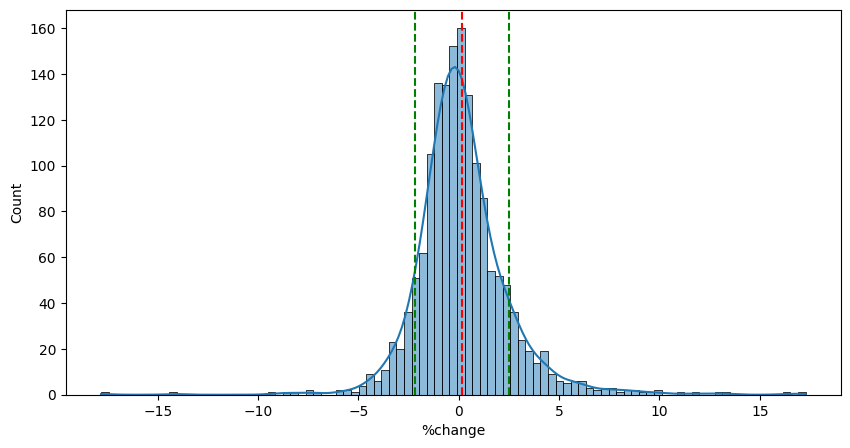

In [51]:
mean,std,req_data=cal_ploting_mean_std_returns(historical_stock_data)

In [52]:
def linear_range(n,mean,std,current_price):
#linear_range_calculation
  pos_change_in_next_ndays=n*mean+std*math.sqrt(n)
  neg_change_in_next_ndays=n*mean-std*math.sqrt(n)

  lower_range=current_price*(1+pos_change_in_next_ndays/100)
  upper_range=current_price*(1+neg_change_in_next_ndays/100)

  return pos_change_in_next_ndays,neg_change_in_next_ndays,lower_range,upper_range


In [40]:
def exponential_range(n,mean,std,current_price):
#linear_range_calculation
  pos_change_in_next_ndays=(n*mean+std*math.sqrt(n))/100
  neg_change_in_next_ndays=(n*mean-std*math.sqrt(n))/100

  lower_range=current_price*math.exp(pos_change_in_next_ndays)
  upper_range=current_price*math.exp(neg_change_in_next_ndays)

  return math.exp(pos_change_in_next_ndays),math.exp(neg_change_in_next_ndays),lower_range,upper_range


## VOLATILITY CONE CALCULATION

In [54]:
req_data
n=18
req_data['vol_next_18_days']=np.nan
for i in range(0,len(req_data)-n+1):
  req_data.iloc[i,3]=(np.std(req_data.iloc[i:i+n,2]))



In [55]:

from datetime import datetime, timedelta

def is_last_thursday(date):
    # Ensure the input date is a datetime object
    if not isinstance(date, datetime):
        date = datetime.strptime(date, '%Y-%m-%d')

    # Get the year and month of the given date
    year = date.year
    month = date.month

    # Find the last day of the month
    if month == 12:
        last_day_of_month = datetime(year + 1, 1, 1) - timedelta(days=1)
    else:
        last_day_of_month = datetime(year, month + 1, 1) - timedelta(days=1)

    # Calculate the last Thursday of the month
    last_thursday_of_month = last_day_of_month - timedelta(days=(last_day_of_month.weekday() - 3) % 7)

    # Check if the given date is the last Thursday
    return date.date() == last_thursday_of_month.date()

# Example usage
# date_str = '2024-08-29'  # Example date (YYYY-MM-DD)

# date = datetime.strptime(date_str, '%Y-%m-%d')



In [56]:
volatility_cone=[]
n=18
for i in range(len(req_data)):
  date=req_data.iloc[i,0]
  if is_last_thursday(date):
    volatility_cone.append(req_data.iloc[i-n+1,3])
    # print(req_data.iloc[i-17,0])




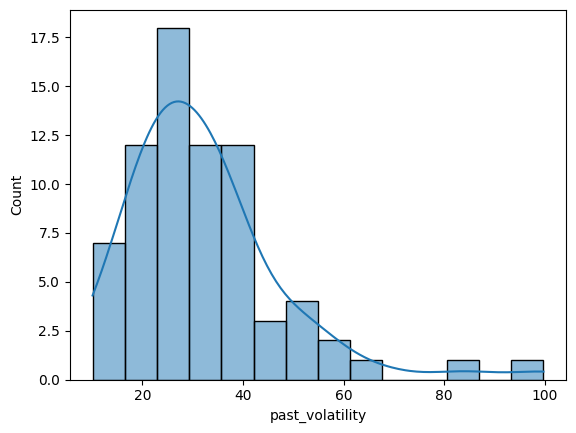

32.28928108018341 15.574034339876546


In [57]:
volatility_cone=pd.DataFrame(volatility_cone)
volatility_cone.columns=['past_volatility']
n=math.sqrt(252)
volatility_cone=volatility_cone*n
volatility_cone
plt.plot(figsize=(10,5))
sns.histplot(volatility_cone['past_volatility'],kde=True)
plt.show()
print(volatility_cone['past_volatility'].mean(),volatility_cone['past_volatility'].std())

In [58]:
3913*1.15

4499.95

## MONTE CARLO SIMULATIONS

In [110]:
import numpy as np
import matplotlib.pyplot as plt
for price in [4300,4370,4500,4950,5100,5180,4695]:
# Define inputs
  current_price = price
  mean_return = mean
  volatility = std
  days = 18
  num_simulations = 10000  # Adjust this to a higher number if needed

  # Initialize array to store the price paths
  price_paths = np.zeros((days + 1, num_simulations))

  # Set the initial price
  price_paths[0] = current_price

  # Run simulations
  for i in range(num_simulations):
      for t in range(1, days + 1):
          daily_return = np.random.normal(mean_return, volatility)
          price_paths[t, i] = price_paths[t-1, i] * (1 + daily_return/100)

  # Plotting the simulation paths
  # plt.figure(figsize=(10, 6))
  # plt.plot(price_paths)
  # plt.title('Monte Carlo Simulation of Stock Price Over 5 Days')
  # plt.xlabel('Days')
  # plt.ylabel('Stock Price')

  # plt.grid(True)
  # plt.show()

  # Calculate percentiles for the final prices
  final_prices = price_paths[-1]
  lower_bound = np.percentile(final_prices, 5)
  upper_bound = np.percentile(final_prices, 95)

  print(f"5th Percentile Price: ${lower_bound:.2f}","for ",price)
  print(f"95th Percentile Price: ${upper_bound:.2f}","for",price)
  print("\n")



5th Percentile Price: $3755.18 for  4300
95th Percentile Price: $5201.98 for 4300


5th Percentile Price: $3793.74 for  4370
95th Percentile Price: $5282.16 for 4370


5th Percentile Price: $3914.39 for  4500
95th Percentile Price: $5441.83 for 4500


5th Percentile Price: $4327.35 for  4950
95th Percentile Price: $5975.95 for 4950


5th Percentile Price: $4451.20 for  5100
95th Percentile Price: $6171.20 for 5100


5th Percentile Price: $4496.08 for  5180
95th Percentile Price: $6262.15 for 5180


5th Percentile Price: $4089.85 for  4695
95th Percentile Price: $5659.28 for 4695




In [111]:
for price in [4300,4370,4500,4950,5100,5180,4695]:
  print("linear range upper bound",price*(1+(4*mean+std*math.sqrt(18))/100), "for price :",price)
  print("linear range lower bound",price*(1+(4*mean-std*math.sqrt(18))/100), "for price :",price)
  print("\n")
  print("exponential range upper bound",price*pow((1+(mean+std)/100),18), "for price :",price)
  print("exponential range lower bound",price*pow((1+(mean-std)/100),18), "for price :",price)
  print("\n")
  # print(std,mean)

linear range upper bound 4756.51997629114 for price : 4300
linear range lower bound 3902.53625918252 for price : 4300


exponential range upper bound 6720.925678847424 for price : 4300
exponential range lower bound 2897.7214120896224 for price : 4300


linear range upper bound 4833.951696835414 for price : 4370
linear range lower bound 3966.065919215724 for price : 4370


exponential range upper bound 6830.336096875172 for price : 4370
exponential range lower bound 2944.8936211236396 for price : 4370


linear range upper bound 4977.753463560494 for price : 4500
linear range lower bound 4084.0495735631025 for price : 4500


exponential range upper bound 7033.5268732124205 for price : 4500
exponential range lower bound 3032.499152186814 for price : 4500


linear range upper bound 5475.528809916545 for price : 4950
linear range lower bound 4492.454530919413 for price : 4950


exponential range upper bound 7736.879560533662 for price : 4950
exponential range lower bound 3335.7490674054957 

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Define inputs
for price in [4300,4370,4500,4950,5100,5180,4695]:
  current_price = price
  daily_mean_return = mean/100  # Daily mean return
  daily_volatility = std/100  # Daily volatility
  days = 18
  num_simulations = 10000
  dt = 1  # time step (1 day)

  # Initialize array to store price paths
  price_paths = np.zeros((days + 1, num_simulations))
  price_paths[0] = current_price

  # Run simulations
  for i in range(num_simulations):
      for t in range(1, days + 1):
          # Simulate random component
          rand = np.random.normal(0, 1)
          # Calculate the price using GBM formula
          price_paths[t, i] = price_paths[t-1, i] * np.exp((daily_mean_return - 0.5 * daily_volatility**2) * dt + daily_volatility * np.sqrt(dt) * rand)

  # Plotting the simulation paths
  # plt.figure(figsize=(10, 6))
  # plt.plot(price_paths)
  # plt.title('Geometric Brownian Motion Simulation of Stock Price Over 5 Days')
  # plt.xlabel('Days')
  # plt.ylabel('Stock Price')
  # plt.grid(True)
  # plt.show()

  # Calculate percentiles for the final prices
  final_prices = price_paths[-1]
  lower_bound = np.percentile(final_prices, 5)
  upper_bound = np.percentile(final_prices, 95)

  print(f"5th Percentile Price: ${lower_bound:.2f}","for",price)
  print(f"95th Percentile Price: ${upper_bound:.2f}","for",price)
  print("\n")


5th Percentile Price: $3746.26 for 4300
95th Percentile Price: $5192.03 for 4300


5th Percentile Price: $3801.35 for 4370
95th Percentile Price: $5276.17 for 4370


5th Percentile Price: $3931.14 for 4500
95th Percentile Price: $5431.39 for 4500


5th Percentile Price: $4332.83 for 4950
95th Percentile Price: $5966.99 for 4950


5th Percentile Price: $4440.38 for 5100
95th Percentile Price: $6169.45 for 5100


5th Percentile Price: $4524.12 for 5180
95th Percentile Price: $6262.25 for 5180


5th Percentile Price: $4100.52 for 4695
95th Percentile Price: $5657.01 for 4695




## FUNDAMENTAL_ANALYSIS

In [43]:
df_quat_combined=pd.read_excel('https://docs.google.com/spreadsheets/d/13sthjkzPjobVsDHKxA2F0Y00EgBQGB7Z/export?format=xlsx')
df_quat_combined
df_quat_combined=df_quat_combined.iloc[[0,3,7,17,18,19,23,25]].reset_index(drop=True)

df_quat_combined.columns=df_quat_combined.iloc[0]
df_quat_combined=df_quat_combined.drop(index=0)
# display an interactive google sheet

df_quat_combined


,NaN,Mar '24,Dec '23,Sep '23,Jun '23,Mar '23,Dec '22,Sep '22,Jun '22,Mar '22,...,Sep '20,Jun '20,Mar '20,Dec '19,Sep '19,Jun '19,Mar '19,Dec '18,Sep '18,Jun '18
1,Total Income From Operations,"14,768.75","6,061.28","5,635.70","3,915.35","12,494.67","5,665.54","5,144.79","3,622.46","11,561.13",...,"4,853.60","1,736.74","10,323.00","4,456.35","3,451.07","3,291.44","10,044.44","4,425.29","2,610.33","2,813.82"
2,Increase/Decrease in Stocks,"-1,927.33",-110.86,227.68,-148.13,-674.09,255.15,25.95,-297.73,776.15,...,304.86,"-1,327.55","2,410.51","-1,012.55",-328.13,-358.41,"2,445.44",118.38,"-1,273.74",-122.54
3,"P/L Before Other Inc., Int., Excpt. Items &\nTax","5,257.29","1,223.16","1,177.99",675.45,"2,190.18",716.56,"1,369.66",618.08,"2,117.33",...,809.78,273.09,"1,992.23",670.87,535.32,731.41,"1,984.11",651.79,380.24,386.57
4,Other Income,557.31,459.98,469.37,409.94,722.23,497.18,259.07,191.64,500.66,...,87.97,47.25,159.96,33.18,41.03,59.73,119.40,57.39,70.03,129.29
5,"P/L Before Int., Excpt. Items & Tax","5,814.60","1,683.14","1,647.36","1,085.39","2,912.41","1,213.74","1,628.73",809.72,"2,617.99",...,897.75,320.34,"2,152.19",704.05,576.35,791.14,"2,103.51",709.18,450.27,515.86
6,P/L Before Tax,"5,783.19","1,682.78","1,647.04","1,085.37","2,857.11","1,211.67","1,628.36",809.49,"2,575.88",...,826.29,215.70,"2,051.20",646.00,480.93,816.06,"1,969.83",680.89,448.88,509.62
7,P/L After Tax from Ordinary Activities,"4,296.87","1,254.86","1,232.29",810.43,"2,844.64","1,153.92","1,218.94",607.36,"3,103.99",...,615.05,149.54,"1,249.63",457.32,621.30,562.39,"1,172.94",452.58,285.75,352.75


In [44]:
def plotting_fundamentals(df_quat_combined):

  df_only_june_data=df_quat_combined.iloc[:,[0,4,8,12,16,20,24]]
  df_only_june_data.iloc[:,1:]=df_only_june_data.iloc[:,1:].apply(lambda x: x.str.replace(',','').astype(float))
  df_only_june_data

  df_only_june_data_perc_increase_outer=[]

  for i in range(len(df_only_june_data)):
    df_only_june_data_perc_increase=[]
    for  j in range(1,len(df_only_june_data.columns)-1):
      df_only_june_data_perc_increase.append(((df_only_june_data.iloc[i,j]-df_only_june_data.iloc[i,j+1])/df_only_june_data.iloc[i,j+1]))
    df_only_june_data_perc_increase_outer.append(df_only_june_data_perc_increase)


  for i  in range(len(df_only_june_data_perc_increase_outer)):
    df_only_june_data_per_change_df=pd.DataFrame(df_only_june_data_perc_increase_outer)
    x_data=['june23','june22','june21','june20','june19']
    plt.figure(figsize=(10,5))
    ax=sns.barplot(x=x_data,y=df_only_june_data_per_change_df.iloc[i]*100)
    plt.ylabel(f'%change in {df_only_june_data.iloc[i,0]}',size=10)
    plt.xlabel('june qtr',size=15)
    for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x() + p.get_width() / 2., height, f'{height}', ha='center', va='center')


  plt.show()

## QTR WISE SHARE IN REVENUE AND PROFIT

In [105]:


my_dict={}
for i,year in enumerate(range(24,18,-1)):
  start_col=1+i*4
  end_col=start_col+4
  my_dict[f'fy_{year}']=df_quat_combined.iloc[:,start_col:end_col]

for i in my_dict:
  my_dict[i]=my_dict[i].apply(lambda x: x.str.replace(',','').astype(float))
  my_dict[i]['total']=my_dict[i].sum(axis=1)
  for j in range(5):
    my_dict[i].iloc[:,j]=my_dict[i].iloc[:,j]/my_dict[i].iloc[:,4]


fy_24, fy_23, fy_22, fy_21, fy_20, fy_19 = [my_dict[f'fy_{year}'] for year in range(24, 18, -1)]



print(fy_24)
print(fy_23)
print(fy_22)
print(fy_21)
print(fy_20)
print(fy_19)




0   Mar '24   Dec '23   Sep '23   Jun '23  total
1  0.486117  0.199508  0.185500  0.128875    1.0
2  0.984014  0.056600 -0.116244  0.075629    1.0
3  0.630833  0.146769  0.141349  0.081049    1.0
4  0.293847  0.242529  0.247480  0.216145    1.0
5  0.568360  0.164522  0.161025  0.106094    1.0
6  0.567069  0.165005  0.161500  0.106426    1.0
7  0.565791  0.165234  0.162262  0.106713    1.0
0   Mar '23   Dec '22   Sep '22   Jun '22  total
1  0.464012  0.210400  0.191061  0.134527    1.0
2  0.975924 -0.369397 -0.037569  0.431043    1.0
3  0.447480  0.146402  0.279838  0.126281    1.0
4  0.432442  0.297691  0.155121  0.114746    1.0
5  0.443654  0.184892  0.248108  0.123346    1.0
6  0.439107  0.186221  0.250262  0.124410    1.0
7  0.488362  0.198103  0.209265  0.104270    1.0
0   Mar '22   Dec '21   Sep '21   Jun '21  total
1  0.469582  0.239313  0.225473  0.065631    1.0
2  1.310400  1.503799  0.451342 -2.265541    1.0
3  0.492628  0.245017  0.231878  0.030477    1.0
4  0.508320  0.19977

BASED ON PREV QTR QTR ON QTR

OF REVENUE=8.08%

OF EARNINGS=34.6%

BASED ON TRADING VIEW

REVENUE=15.2%

EARNINGS=7.6%



## HOW CORRECTLY MARKET PREDICTED MARKET

In [106]:
revenue_in_year_=df_quat_combined.iloc[0,:]

revenue_in_year_.iloc[1:]=revenue_in_year_.iloc[1:].str.replace( ',','').astype(float)
revenue_in_year_

# revenue_in_year_['increase_inrev_froom_past_qtr']=[revenue_in_year_[0]]


,1
0,
NaN,Total Income From Operations
Mar '24,14768.75
Dec '23,6061.28
Sep '23,5635.7
Jun '23,3915.35
Mar '23,12494.67
Dec '22,5665.54
Sep '22,5144.79
Jun '22,3622.46


In [107]:
revenue_df=pd.DataFrame(revenue_in_year_.reset_index())
revenue_df=revenue_df.drop(index=0)
revenue_df.columns=['qtr','revenue']

revenue_df




,qtr,revenue
1,Mar '24,14768.75
2,Dec '23,6061.28
3,Sep '23,5635.7
4,Jun '23,3915.35
5,Mar '23,12494.67
6,Dec '22,5665.54
7,Sep '22,5144.79
8,Jun '22,3622.46
9,Mar '22,11561.13
10,Dec '21,5891.9


In [108]:

import yfinance as yf
import pandas as pd

# Example list of quarterly revenues
quarterly_revenues_data = {
    'qtr': ["Mar '24", "Dec '23", "Sep '23", "Jun '23", "Mar '23", "Dec '22", "Sep '22", "Jun '22", "Mar '22", "Dec '21",
            "Sep '21", "Jun '21", "Mar '21", "Dec '20", "Sep '20", "Jun '20", "Mar '20", "Dec '19", "Sep '19", "Jun '19",
            "Mar '19", "Dec '18", "Sep '18", "Jun '18"],
    'revenue': [14768.75, 6061.28, 5635.7, 3915.35, 12494.67, 5665.54, 5144.79, 3622.46, 11561.13, 5891.9,
                5551.16, 1615.83, 10738.74, 5425.46, 4853.6, 1736.74, 10323.0, 4456.35, 3451.07, 3291.44,
                10044.44, 4425.29, 2610.33, 2813.82]
}

# Convert the data to a DataFrame
quarterly_revenues_df = pd.DataFrame(quarterly_revenues_data)

# Function to map dates to quarters
def get_quarter(date):
    month = date.month
    year = date.year
    if month in [1, 2, 3]:
        return f"Mar '{year % 100:02d}"
    elif month in [4, 5, 6]:
        return f"Jun '{year % 100:02d}"
    elif month in [7, 8, 9]:
        return f"Sep '{year % 100:02d}"
    else:
        return f"Dec '{year % 100:02d}"

# Function to calculate the ratio
def calculate_ratio(ticker, quarterly_revenues_df, start_date, end_date):
    # Fetch historical market cap data
    stock = yf.Ticker(ticker)
    hist = stock.history(start=start_date, end=end_date)

    # Calculate market cap using Close price and Shares Outstanding
    hist['Market Cap'] = hist['Close'] * stock.info['sharesOutstanding']

    # Calculate daily market cap changes
    hist['Market Cap Change'] = hist['Market Cap'].diff()

    # Number of days in the quarter (assuming 90 days for simplicity)
    days_in_quarter = {
        'Jun': 90,
        'Sep': 91,
        'Dec': 92,
        'Mar': 92
    }

    # Function to get daily revenue for a specific date
    def get_daily_revenue(date):
        quarter = get_quarter(date)
        quarterly_revenue = quarterly_revenues_df.loc[quarterly_revenues_df['qtr'] == quarter, 'revenue'].values[0]
        quarter_key = quarter.split(' ')[0]
        return quarterly_revenue / days_in_quarter[quarter_key]

    # Calculate daily revenue for each date
    hist['Daily Revenue'] = hist.index.to_series().apply(get_daily_revenue)

    # Calculate the ratio considering weekends and holidays
    hist['Ratio'] = None
    for i in range(1, len(hist)):
        market_cap_change = hist['Market Cap Change'].iloc[i]
        days_diff = (hist.index[i] - hist.index[i-1]).days
        daily_revenue = (hist['Daily Revenue'].iloc[i])*pow(10,7)
        hist['Ratio'].iloc[i] = market_cap_change / (daily_revenue * days_diff)

    return hist

# Example parameters
ticker = 'HAL.NS'
start_date = '2018-04-01'
end_date = '2024-03-31'

# Calculate the ratio
df = calculate_ratio(ticker, quarterly_revenues_df, start_date, end_date)
print(df[['Market Cap', 'Market Cap Change', 'Daily Revenue', 'Ratio']])



Streaming output truncated to the last 5000 lines.
<ipython-input-108-95b46fdd7252>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Ratio'].iloc[i] = market_cap_change / (daily_revenue * days_diff)
<ipython-input-108-95b46fdd7252>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Ratio'].iloc[i] = market_cap_change / (daily_revenue * days_diff)
<ipython-input-108-95b46fdd7252>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

                             Market Cap  Market Cap Change  Daily Revenue  \
Date                                                                        
2018-04-02 00:00:00+05:30  3.215247e+11                NaN      31.264667   
2018-04-03 00:00:00+05:30  3.157474e+11      -5.777287e+09      31.264667   
2018-04-04 00:00:00+05:30  3.121943e+11      -3.553071e+09      31.264667   
2018-04-05 00:00:00+05:30  3.116488e+11      -5.455839e+08      31.264667   
2018-04-06 00:00:00+05:30  3.085434e+11      -3.105391e+09      31.264667   
...                                 ...                ...            ...   
2024-03-21 00:00:00+05:30  2.087481e+12       9.419702e+10     160.529891   
2024-03-22 00:00:00+05:30  2.120552e+12       3.307089e+10     160.529891   
2024-03-26 00:00:00+05:30  2.207492e+12       8.694075e+10     160.529891   
2024-03-27 00:00:00+05:30  2.194284e+12      -1.320831e+10     160.529891   
2024-03-28 00:00:00+05:30  2.225014e+12       3.073018e+10     160.529891   

<ipython-input-108-95b46fdd7252>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Ratio'].iloc[i] = market_cap_change / (daily_revenue * days_diff)
<ipython-input-108-95b46fdd7252>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Ratio'].iloc[i] = market_cap_change / (daily_revenue * days_diff)
<ipython-input-108-95b46fdd7252>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Ratio'].iloc[i] = market_cap_change / (d

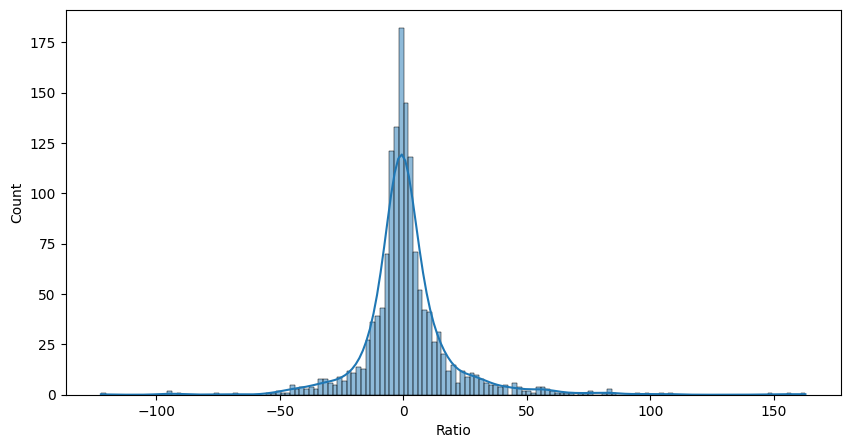

1.5482833123784565 19.430727133782458 162.89453667386778 -122.48557716326833
                                  Open         High          Low        Close  \
Date                                                                            
2024-03-14 00:00:00+05:30  3053.949951  3177.899902  3017.050049  3165.949951   
2024-03-15 00:00:00+05:30  3164.949951  3182.550049  3006.000000  3099.100098   
2024-03-18 00:00:00+05:30  3138.000000  3184.000000  3105.399902  3121.949951   
2024-03-19 00:00:00+05:30  3111.750000  3144.399902  3034.350098  3058.899902   
2024-03-20 00:00:00+05:30  3074.000000  3080.000000  2913.600098  2980.500000   
2024-03-21 00:00:00+05:30  3024.000000  3128.449951  3020.000000  3121.350098   
2024-03-22 00:00:00+05:30  3114.050049  3209.899902  3085.000000  3170.800049   
2024-03-26 00:00:00+05:30  3193.000000  3305.000000  3180.000000  3300.800049   
2024-03-27 00:00:00+05:30  3317.000000  3324.899902  3245.000000  3281.050049   
2024-03-28 00:00:00+05:30  3291.

In [109]:
plt.figure(figsize=(10,5))
sns.histplot(df['Ratio'],kde=True)
plt.show()

print(df['Ratio'].mean(),df['Ratio'].std(),df['Ratio'].max(),df['Ratio'].min())
print(df.tail(10))